# Music Streaming Analysis - Phase 1: Exploratory Data Analysis
---
## Project Overview

**Goal:** Explore how audio features relate to song popularity and whether these relationships depend on musical context (e.g., genre, duration, mode).

**Key Questions:**
1. How is popularity distributed across songs?
2. Do audio features show global relationships with popularity?
3. Do these relationships vary by genre?
4. Are there duration or mode patterns in popularity?
5. Which artists are consistently high performers?

**Key Insight:**
Weak global correlations mask strong genre-specific patterns, suggesting that popularity drivers are context-dependent rather than universal.

**Dataset:** Spotify Tracks Dataset (114,000 songs)  
**Source:** https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset

**Learning Objectives**

- Load and explore large-scale music data (114K songs!)
- Analyze genre-specific patterns
- Understand relationships between audio features and popularity
- Prepare data for machine learning


---
## Executive Summary (Key Findings)

After analyzing 114,000 Spotify tracks across 114 genres, here are the main discoveries:

1. **Simpson's Paradox Confirmed**
   - Overall audio features show WEAK correlation with popularity (r ≈ 0)
   - But genre-specific effects are STRONG and OPPOSITE
   - Energy boosts electronic (r=+0.25) but hurts acoustic (r=-0.20)
   - **Implication:** No universal "hit formula" - context matters!

2. **Optimal Song Duration: 3-4 Minutes**
   - Songs 3-4 min long have highest avg popularity (34.75)
   - Very short (<2min) and very long (>5min) underperform
   - **Implication:** Traditional pop song length remains optimal

3. **Genre Matters More Than Individual Features**
   - Genres have significantly different popularity (ANOVA p<0.001)
   - Genre explains ~25.2% of popularity variance (η² = 0.252)
   - **Implication:** Focus on genre-specific optimization

4. **Explicit Content Effect:**
   - Explicit content is associated with a small but statistically significant difference in popularity. Explicit tracks have a slightly higher average popularity than non-explicit tracks
   - **Implication:** Explicit content alone is not a strong driver of popularity. The observed difference likely reflects genre and audience effects rather than explicitness itself, suggesting that explicit lyrics are context-dependent rather than universally beneficial.

5. **Stratified Sampling Design**
   - Dataset uses ~1,000 songs per genre (balanced)
   - Enables robust within-genre analysis
   - **Caveat:** Aggregate stats don't reflect true Spotify distribution

---

# 1. Setup and Installation

In [ ]:
# Install this if not available
#!pip install -q seaborn matplotlib pandas numpy scipy statsmodels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, ttest_ind
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [ ]:
df = pd.read_csv("data/dataset.csv", index_col=0)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.shape

(114000, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

The dataset contains over 114,000 tracks with standardized audio features, popularity scores, and genre labels. Missing values are minimal and confined to artist and track metadata, which do not affect quantitative analysis. Overall, the dataset is well-structured and suitable for exploratory and statistical analysis.

## 2. Data Quality:

### 2.1 Check missing values:

In [6]:
df.isnull().sum().sort_values(ascending=False)

,0
artists,1
album_name,1
track_name,1
track_id,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


In [7]:
#Dropping missing values
df = df.dropna(subset=['artists', 'album_name', 'track_name'])
df.isnull().sum()


,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


### 2.2 Duplicate detection & removal

In [8]:
# Duplicate Check
print(df.duplicated().sum())

450


In [9]:
duplicates = df[df.duplicated(keep=False)]
print("Example duplicate songs:")
print(duplicates.head(10))

Example duplicate songs:
                    track_id                 artists          album_name  \
1874  0CDucx9lKxuCZplLXUz0iX  Buena Onda Reggae Club             Disco 2   
1925  0CDucx9lKxuCZplLXUz0iX  Buena Onda Reggae Club             Disco 2   
2109  2aibwv5hGXSgw7Yru8IYTO   Red Hot Chili Peppers    Stadium Arcadium   
2155  2aibwv5hGXSgw7Yru8IYTO   Red Hot Chili Peppers    Stadium Arcadium   
3683  7mULVp0DJrI2Nd6GesLvxn            Joy Division  Timeless Rock Hits   
3738  7mULVp0DJrI2Nd6GesLvxn            Joy Division  Timeless Rock Hits   
4598  6d3RIvHfVkoOtW1WHXmbX3         Little Symphony            Serenity   
4648  6d3RIvHfVkoOtW1WHXmbX3         Little Symphony            Serenity   
5721  481beimUiUnMUzSbOAFcUT            SUPER BEAVER       突破口 / 自慢になりたい   
5769  481beimUiUnMUzSbOAFcUT            SUPER BEAVER       突破口 / 自慢になりたい   

                   track_name  popularity  duration_ms  explicit  \
1874         Song for Rollins          16       219346     False   
19

In [10]:
duplicate_tracks = duplicates.groupby('track_id').size().sort_values(ascending=False)
duplicate_tracks.head(10)

,0
track_id,
6P2z6tZi1K8pyHXV1i0DnK,3
2abeQBWSIzjO8J1KrPFZHy,3
52VSOpFbg4GBpPNNv4ulbP,3
0jI5ex80hYYbLQsX3G5Ze7,3
5sP7Jb0FBF2fatb1CZ3zpa,3
6IzTjoU9t5DiBN4BmiWBB8,3
5VOJiy4ZseTafrksLPCxim,2
5SBm6jz3bNhnbgerw5sJ9g,2
5SB73InpxuEQ20qEWhOQFV,2


In [11]:
### Drop duplicates - since they are duplicated in all rows
print(f"Before dropping duplicates: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"After dropping duplicates: {df.shape}")

Before dropping duplicates: (113999, 20)
After dropping duplicates: (113549, 20)


### 2.3 Invalid data cleaning (tempo=0)

In [12]:
## Tempo = 0 is invalid music, must clean up
print('Number of songs that have temp = 0: ' + str(df[df['tempo'] == 0].shape[0]))
print('Pct: ' + str(df[df['tempo'] == 0].shape[0]/ len(df) * 100))

Number of songs that have temp = 0: 157
Pct: 0.13826629913077174


In [13]:
# Drop them since it's only 0.13% of the dataset
df = df[df['tempo'] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113392 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113392 non-null  object 
 1   artists           113392 non-null  object 
 2   album_name        113392 non-null  object 
 3   track_name        113392 non-null  object 
 4   popularity        113392 non-null  int64  
 5   duration_ms       113392 non-null  int64  
 6   explicit          113392 non-null  bool   
 7   danceability      113392 non-null  float64
 8   energy            113392 non-null  float64
 9   key               113392 non-null  int64  
 10  loudness          113392 non-null  float64
 11  mode              113392 non-null  int64  
 12  speechiness       113392 non-null  float64
 13  acousticness      113392 non-null  float64
 14  instrumentalness  113392 non-null  float64
 15  liveness          113392 non-null  float64
 16  valence           113392 

### 2.4 Dataset summary statistics table

In [14]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113392.00000,1.133920e+05,113392.000000,113392.00000,113392.000000,113392.000000,113392.000000,113392.000000,113392.000000,113392.000000,113392.000000,113392.000000,113392.000000,113392.000000
mean,33.31907,2.281593e+05,0.567816,0.64281,5.309537,-8.224233,0.637796,0.084792,0.313811,0.155018,0.213279,0.474862,122.344906,3.909623
std,22.29502,1.054097e+05,0.172240,0.25031,3.559564,4.975373,0.480639,0.105788,0.331720,0.308549,0.190011,0.258781,29.646680,0.407246
min,0.00000,1.580000e+04,0.051300,0.00002,0.000000,-46.591000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,30.200000,0.000000
25%,17.00000,1.743330e+05,0.457000,0.47400,2.000000,-9.981000,0.000000,0.035900,0.016800,0.000000,0.097900,0.261000,99.506000,4.000000
50%,35.00000,2.130660e+05,0.581000,0.68600,5.000000,-6.990000,1.000000,0.049000,0.168000,0.000041,0.132000,0.464000,122.028000,4.000000
75%,50.00000,2.616500e+05,0.695000,0.85400,8.000000,-4.998000,1.000000,0.084600,0.595000,0.047200,0.273000,0.683000,140.081000,4.000000
max,100.00000,5.237295e+06,0.985000,1.00000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


#### Analysis:
- **Popularity**: right skewed, with mean = 33 while median = 35 with high variance (~22) => most songs are not popular while a small portion of songs dominates (a mixture of hits & non-hits)

Audio Features (Spotify API standard):
- Danceability: range (0,0.985) - nice distributed
- Energy: mean = 0.68 => relatively high energy
- Valence: 0.47 avg - balanced positive/negative mood
- Acousticness: 0.31 avg - mostly electric/produced
- Instrumentalness: 0.16 avg - mostly vocal tracks
- Speechiness: 0.08 avg - mostly music, not spoken word
- Liveness: 0.22 avg - mostly studio recordings

Technical Features:
- Tempo: 122 BPM average (moderate)
- Loudness: -8.26 dB average
- Duration: ~2 min 17 sec average (normal song length)

In [15]:
# Create comprehensive summary table
summary_stats = pd.DataFrame({
    'Metric': [
        'Total Tracks',
        'Unique Artists',
        'Unique Albums',
        'Genres',
        'Hit Rate (Top 30%)',
        'Explicit Rate',
        'Avg Duration (min)'
    ],
    'Value': [
        f"{len(df):,}",
        f"{df['artists'].nunique():,}",
        f"{df['album_name'].nunique():,}",
        df['track_genre'].nunique(),
        f"{(df['popularity'] >= df['popularity'].quantile(0.70)).mean()*100:.1f}%",
        f"{df['explicit'].mean()*100:.1f}%",
        f"{df['duration_ms'].mean()/60000:.2f}"
    ]
})

print(summary_stats.to_string(index=False))

            Metric   Value
      Total Tracks 113,392
    Unique Artists  31,388
     Unique Albums  46,531
            Genres     114
Hit Rate (Top 30%)   30.4%
     Explicit Rate    8.6%
Avg Duration (min)    3.80


The dataset contains a large and diverse collection of tracks spanning many artists, albums, and genres. Popularity is concentrated among a minority of songs, with roughly 30% classified as hits, reflecting a skewed success distribution. Most tracks are relatively short and non-explicit, indicating that mainstream music in this dataset tends toward concise, broadly accessible content.

## 3. Target Variable Analysis

### 3.1 Popularity distribution

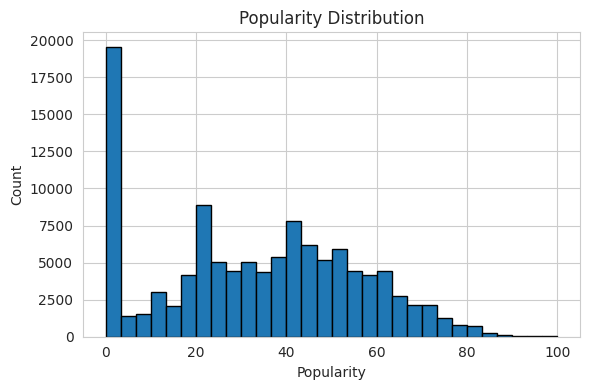

In [16]:
plt.figure(figsize=(6,4))
plt.hist(df['popularity'], bins=30, edgecolor='black')
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.title("Popularity Distribution")
plt.tight_layout()
plt.show()

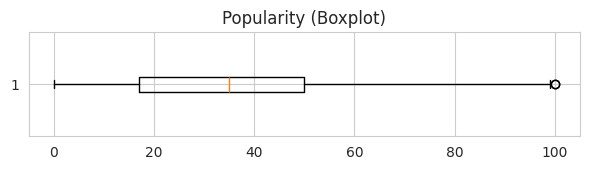

In [17]:
plt.figure(figsize=(6,1.8))
plt.boxplot(df['popularity'], vert=False)
plt.title("Popularity (Boxplot)")
plt.tight_layout()
plt.show()

Conclusion:
Popularity is not evenly distributed across songs; instead, success is concentrated among a small subset of tracks. This motivates both robust descriptive analysis and alternative modeling approaches such as hit classification.

### 3.2 Define hit threshold:

In [18]:
### 3.2 Define Hit Threshold
# Method 1: Percentile-based
print("\n1. PERCENTILE-BASED APPROACH")
print("-" * 50)

percentiles = [0.70, 0.75, 0.80, 0.85, 0.90]
thresholds = {p: df['popularity'].quantile(p) for p in percentiles}

print("\nPopularity Thresholds by Percentile:")
for p, threshold in thresholds.items():
    hit_count = (df['popularity'] >= threshold).sum()
    hit_rate = (df['popularity'] >= threshold).mean() * 100
    print(f"  Top {int((1-p)*100):2d}% (≥{threshold:5.1f}): {hit_count:6,} songs ({hit_rate:4.1f}%)")

# Method 2: Absolute threshold
print("\n2. ABSOLUTE THRESHOLD APPROACH")
print("-" * 50)

absolute_thresholds = [50, 60, 70, 80, 90]
print("\nHits by Absolute Popularity Score:")
for threshold in absolute_thresholds:
    hit_count = (df['popularity'] >= threshold).sum()
    hit_rate = (df['popularity'] >= threshold).mean() * 100
    print(f"  Popularity ≥ {threshold}: {hit_count:6,} songs ({hit_rate:5.2f}%)")


1. PERCENTILE-BASED APPROACH
--------------------------------------------------

Popularity Thresholds by Percentile:
  Top 30% (≥ 47.0): 34,487 songs (30.4%)
  Top 25% (≥ 50.0): 29,328 songs (25.9%)
  Top 19% (≥ 54.0): 23,400 songs (20.6%)
  Top 15% (≥ 58.0): 17,532 songs (15.5%)
  Top  9% (≥ 63.0): 11,425 songs (10.1%)

2. ABSOLUTE THRESHOLD APPROACH
--------------------------------------------------

Hits by Absolute Popularity Score:
  Popularity ≥ 50: 29,328 songs (25.86%)
  Popularity ≥ 60: 14,806 songs (13.06%)
  Popularity ≥ 70:  5,466 songs ( 4.82%)
  Popularity ≥ 80:  1,198 songs ( 1.06%)
  Popularity ≥ 90:     98 songs ( 0.09%)


Choose Method 1 - Top 30%. The reasons are:
1. Represents 'above average' success
2. Balanced for ML classification (30% positive class)
3. Industry-aligned: ~1 in 3 songs achieves commercial success
4. Avoids extreme imbalance (not too rare or too common)

In [19]:
CHOSEN_THRESHOLD = df['popularity'].quantile(0.70)
df['is_hit'] = (df['popularity'] >= CHOSEN_THRESHOLD).astype(int)
df['is_hit'].value_counts()

,count
is_hit,
0,78905
1,34487


### 3.3 Hit Rate Analysis:

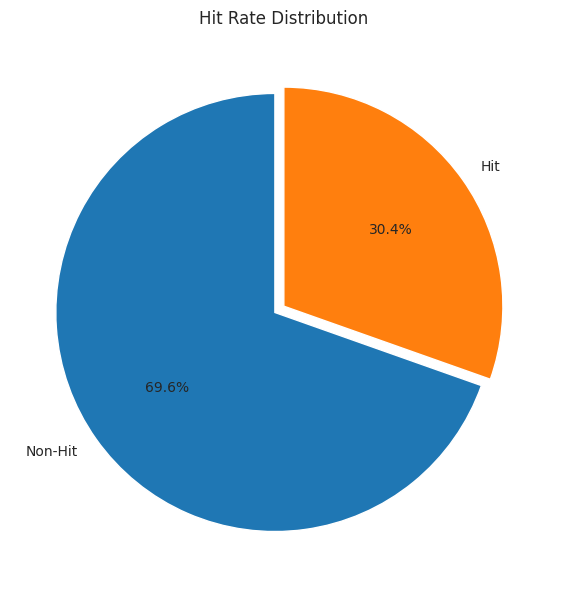

In [20]:
## Pie Chart (hit rate)
hit_counts = df['is_hit'].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(hit_counts,labels=['Non-Hit', 'Hit'],autopct='%1.1f%%',startangle=90,explode=(0.05, 0))
plt.title('Hit Rate Distribution')
plt.tight_layout()
plt.show()


Only about 30% of tracks qualify as hits, confirming with our method of defining hits.

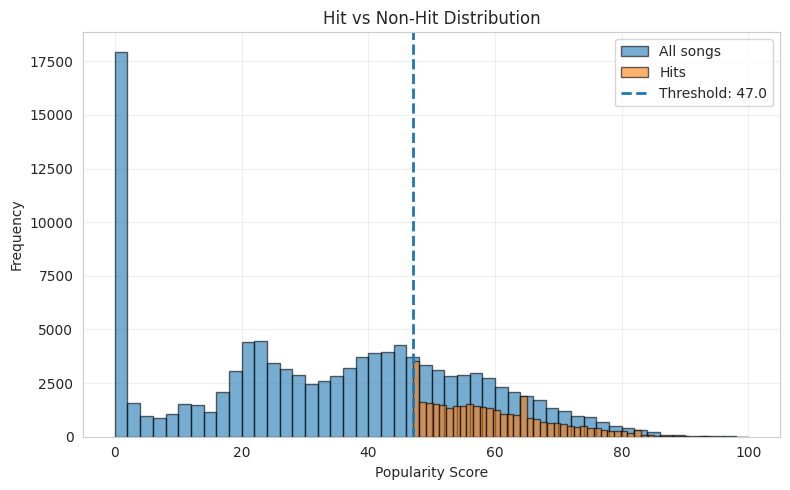

In [21]:
# Hit vs Non-Hit
plt.figure(figsize=(8,5))

plt.hist(df['popularity'], bins=50, alpha=0.6, edgecolor='black', label='All songs')
plt.hist(df.loc[df['is_hit']==1, 'popularity'], bins=50, alpha=0.6, edgecolor='black', label='Hits')

plt.axvline(CHOSEN_THRESHOLD, linestyle='--', linewidth=2,label=f'Threshold: {CHOSEN_THRESHOLD:.1f}')

plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.title('Hit vs Non-Hit Distribution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The chosen 30th-percentile threshold cleanly separates the upper portion of the popularity distribution while preserving a smooth transition between non-hits and hits. This suggests the threshold captures above-average success without imposing an artificial boundary.

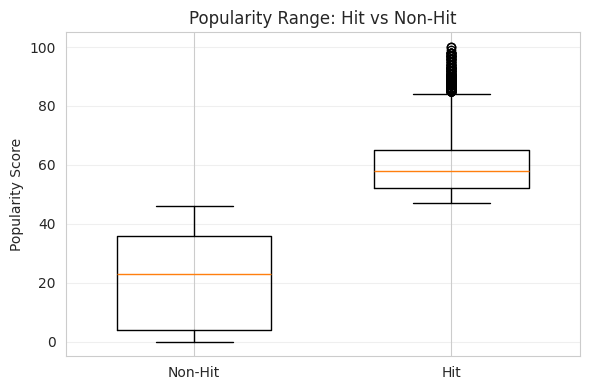

In [22]:
# Boxplot comparison (popularity by hit status)
hit_data = df.loc[df['is_hit']==1, 'popularity']
non_hit_data = df.loc[df['is_hit']==0, 'popularity']

plt.figure(figsize=(6,4))
plt.boxplot([non_hit_data, hit_data], labels=['Non-Hit', 'Hit'], widths=0.6)

plt.ylabel('Popularity Score')
plt.title('Popularity Range: Hit vs Non-Hit')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Songs classified as hits exhibit substantially higher median popularity and broader upper-range variation than non-hits, confirming that the hit label corresponds to a distinct level of commercial performance.

## 4.1 Genre Sampling Distribution:

In [23]:
genre_counts = df['track_genre'].value_counts()
print(f"Total Genres: {len(genre_counts)}")
print(f"Total Songs: {len(df)}")
print(f"Mean songs per genre: {genre_counts.mean():.1f}")
print(f"Median songs per genre: {genre_counts.median():.1f}")
print(f"Std Dev: {genre_counts.std():.1f}")
print(f"Min songs in a genre: {genre_counts.min()}")
print(f"Max songs in a genre: {genre_counts.max()}")

Total Genres: 114
Total Songs: 113392
Mean songs per genre: 994.7
Median songs per genre: 999.0
Std Dev: 17.3
Min songs in a genre: 862
Max songs in a genre: 1000


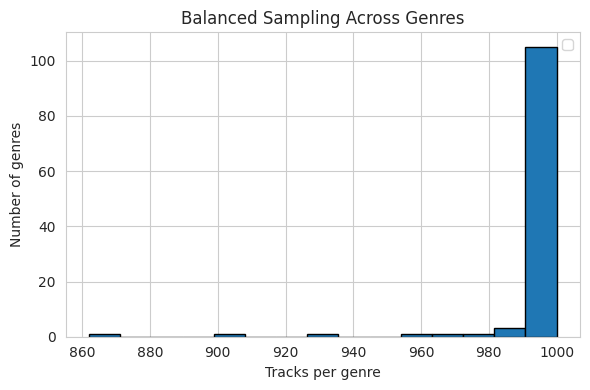

In [24]:
genre_counts = df['track_genre'].value_counts()

plt.figure(figsize=(6,4))
plt.hist(genre_counts.values, bins=15, edgecolor='black')
plt.xlabel("Tracks per genre")
plt.ylabel("Number of genres")
plt.title("Balanced Sampling Across Genres")
plt.legend()
plt.tight_layout()
plt.show()


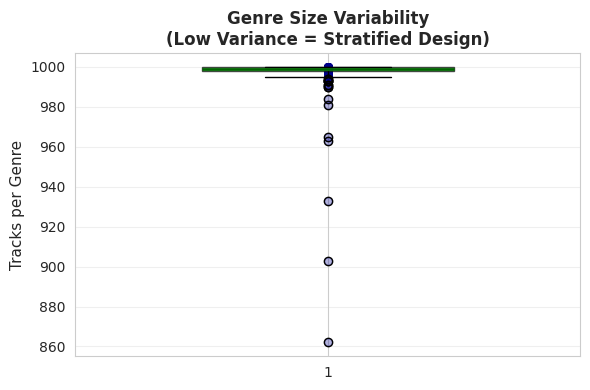

In [25]:

# Box plot showing variance
plt.figure(figsize=(6,4))
plt.boxplot([genre_counts.values], vert=True, widths=0.5, patch_artist=True,boxprops=dict(facecolor='lightgreen', alpha=0.7),medianprops=dict(color='darkgreen', linewidth=2))
plt.scatter([1] * len(genre_counts), genre_counts.values,
                   alpha=0.3, s=30, color='darkblue')
plt.ylabel('Tracks per Genre', fontsize=11)
plt.title('Genre Size Variability\n(Low Variance = Stratified Design)',fontweight='bold', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [26]:
# Coefficient of variation (measure of balance)
cv = (genre_counts.std() / genre_counts.mean()) * 100
print(f"Coefficient of Variation: {cv:.2f}%")

if cv < 10:
    balance_assessment = "Highly Balanced (Stratified Design)"
elif cv < 25:
    balance_assessment = "Moderately Balanced"
else:
    balance_assessment = "Unbalanced (Natural Distribution)"
print(f"Assessment: {balance_assessment}")

Coefficient of Variation: 1.74%
Assessment: Highly Balanced (Stratified Design)


The genre distribution indicates a stratified (balanced) sampling design rather than a natural Spotify catalog distribution. Genre counts exhibit low variability, with most genres containing a similar number of tracks, confirming that the dataset was intentionally balanced to support fair genre-level analysis.

This design provides clear advantages: it ensures equal statistical power across genres, enables meaningful cross-genre comparisons, and prevents dominant genres from overwhelming aggregate results. As a result, the dataset is well-suited for genre-specific analysis and modeling.

However, this balance also introduces limitations. Aggregate statistics do not reflect real-world genre prevalence, as popular genres are underrepresented while niche genres are overrepresented. Consequently, population-level interpretations should be made with caution.

### 4.2 Genre Popularity Differences (with ANOVA)

In [27]:
genre_pop_stats  = df.groupby('track_genre')['popularity'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).round(2).sort_values(by='mean', ascending=False)
genre_pop_stats.head(15)

,count,mean,median,std,min,max
track_genre,,,,,,
pop-film,999,59.28,60.0,10.25,0,80
k-pop,998,56.96,60.0,16.86,0,88
chill,999,53.70,57.0,14.86,0,93
sad,1000,52.38,54.0,11.49,0,83
grunge,999,49.58,55.0,18.49,0,85
indian,999,49.53,49.0,11.35,0,88
anime,999,48.77,50.0,11.82,0,83
emo,1000,48.13,51.0,17.59,0,87
pop,993,47.90,66.0,33.94,0,100


In [28]:
# Overall statistics
print(f"Highest genre mean: {genre_pop_stats['mean'].max():.2f} ({genre_pop_stats['mean'].idxmax()})")
print(f"Lowest genre mean:  {genre_pop_stats['mean'].min():.2f} ({genre_pop_stats['mean'].idxmin()})")
print(f"Range: {genre_pop_stats['mean'].max() - genre_pop_stats['mean'].min():.2f} points")
print(f"Std Dev of means: {genre_pop_stats['mean'].std():.2f}")

# Calculate effect size
overall_mean = df['popularity'].mean()
overall_std = df['popularity'].std()
largest_diff = genre_pop_stats['mean'].max() - genre_pop_stats['mean'].min()
cohens_d = largest_diff / overall_std

print(f"\nEffect Size (Cohen's d): {cohens_d:.3f}")
if cohens_d < 0.2:
    effect = "negligible"
elif cohens_d < 0.5:
    effect = "small"
elif cohens_d < 0.8:
    effect = "medium"
else:
    effect = "large"
print(f"Interpretation: {effect.upper()} effect")

Highest genre mean: 59.28 (pop-film)
Lowest genre mean:  2.23 (iranian)
Range: 57.05 points
Std Dev of means: 11.28

Effect Size (Cohen's d): 2.559
Interpretation: LARGE effect


Average popularity varies widely between genres, with the highest and lowest genre means differing by over 57 popularity points, and a large standardized effect (Cohen’s d = 2.56). This confirms that genre is a major structural driver of popularity.

In [29]:
### Statistical Test: ANOVA
# Prepare data
genre_groups = [df[df['track_genre'] == genre]['popularity'].values
                for genre in df['track_genre'].unique()]

# Run ANOVA
f_stat, p_val = f_oneway(*genre_groups)

# Calculate eta-squared
grand_mean = df['popularity'].mean()
ss_between = sum(len(df[df['track_genre'] == g]) * (df[df['track_genre'] == g]['popularity'].mean() - grand_mean)**2 for g in df['track_genre'].unique())
ss_total = sum((df['popularity'] - grand_mean)**2)
eta_squared = ss_between / ss_total

# Results summary
print(f"\nTest Results:")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.2e}")
print(f"Eta-squared (η²): {eta_squared:.4f}")

if p_val < 0.001:
    print(f"Genres have SIGNIFICANTLY different popularity (p < 0.001)")
    print(f"Genre explains {eta_squared*100:.1f}% of popularity variance")
    if eta_squared > 0.14:
        print(f"Effect size: LARGE (genre is a major factor)")
    elif eta_squared > 0.06:
        print(f"Effect size: MEDIUM")
    else:
        print(f"Effect size: SMALL")
else:
    print(f"  No significant difference between genres")


Test Results:
F-statistic: 337.81
P-value: 0.00e+00
Eta-squared (η²): 0.2520
Genres have SIGNIFICANTLY different popularity (p < 0.001)
Genre explains 25.2% of popularity variance
Effect size: LARGE (genre is a major factor)


The ANOVA results show strong and statistically significant differences in popularity across genres (F = 337.74, p < 0.001). Genre alone explains approximately 25% of the total variance in popularity, indicating a large effect size (η² = 0.252).

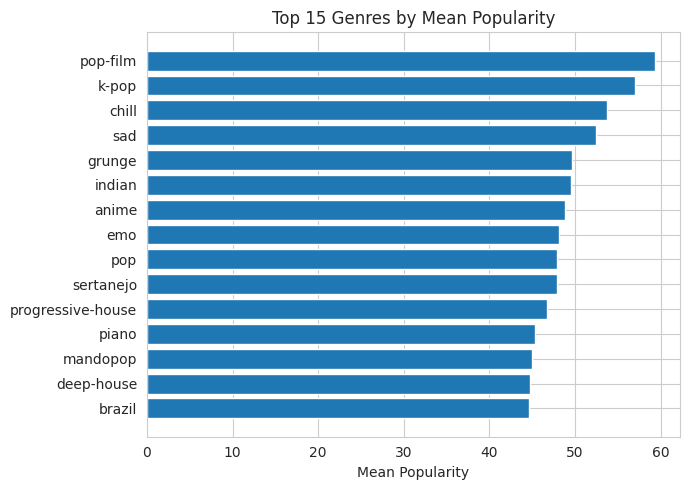

In [30]:
top15 = genre_pop_stats.head(15)['mean'].sort_values()
plt.figure(figsize=(7,5))
plt.barh(top15.index, top15.values)
plt.xlabel("Mean Popularity")
plt.title("Top 15 Genres by Mean Popularity")
plt.tight_layout()
plt.show()

### 4.3 Audio Signatures by Genre

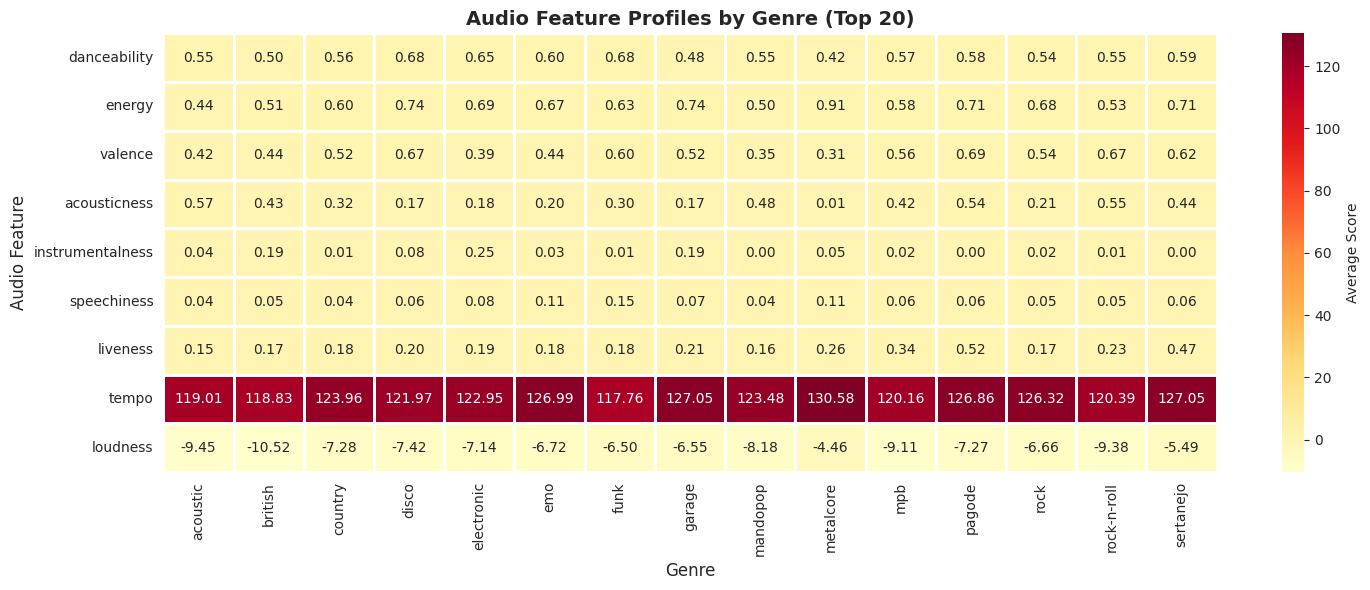

In [31]:
audio_features = ['danceability', 'energy', 'valence', 'acousticness','instrumentalness', 'speechiness', 'liveness', 'tempo', 'loudness']
top_15 = df['track_genre'].value_counts().head(15).index
feature_means = df[df['track_genre'].isin(top_15)].groupby('track_genre')[audio_features].mean()

# Create heatmap
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(feature_means.T, annot=True, fmt='.2f', cmap='YlOrRd',
            linewidths=1, cbar_kws={'label': 'Average Score'}, ax=ax)
ax.set_title('Audio Feature Profiles by Genre (Top 20)', fontweight='bold', fontsize=14)
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Audio Feature', fontsize=12)

plt.tight_layout()
plt.show()


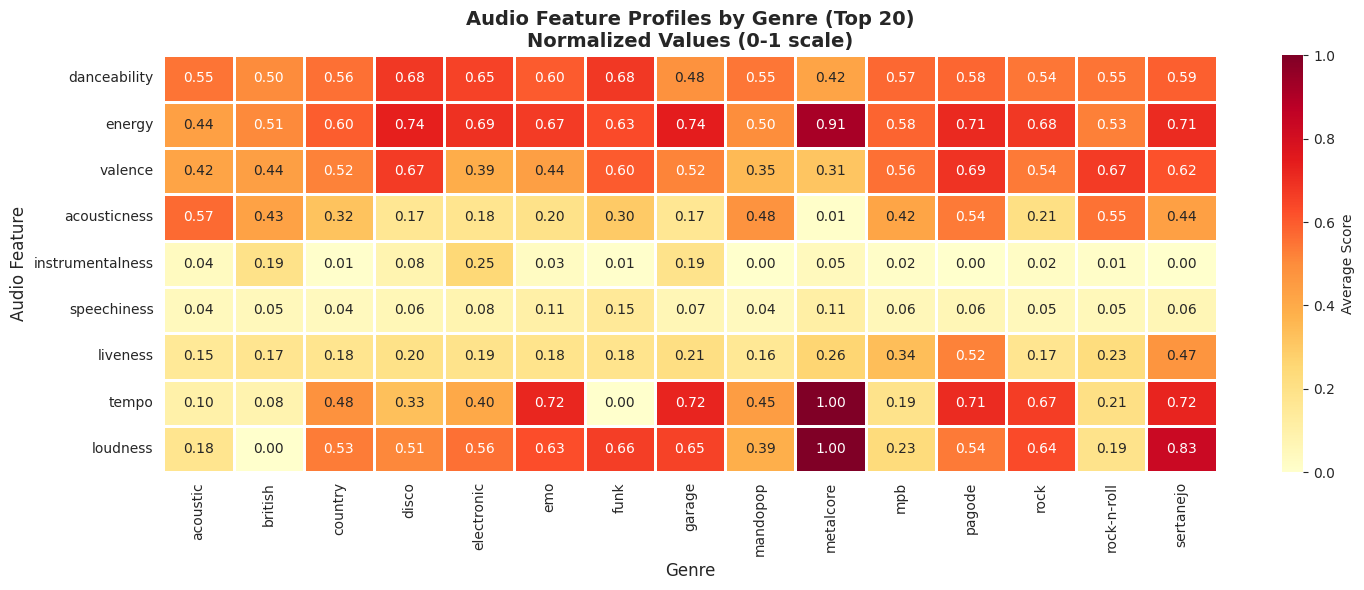

In [32]:
## Tempo & loudness have different scale -> normlaize for better comparision
feature_profiles_normalized = feature_means.copy()
feature_profiles_normalized['tempo'] = (feature_means['tempo'] - feature_means['tempo'].min()) / (feature_means['tempo'].max() - feature_means['tempo'].min())
feature_profiles_normalized['loudness'] = (feature_means['loudness'] - feature_means['loudness'].min()) / (feature_means['loudness'].max() - feature_means['loudness'].min())
# Create heatmap
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(feature_profiles_normalized.T, annot=True, fmt='.2f', cmap='YlOrRd',
            linewidths=1, cbar_kws={'label': 'Average Score'}, ax=ax)
ax.set_title('Audio Feature Profiles by Genre (Top 20)\nNormalized Values (0-1 scale)', fontweight='bold', fontsize=14)
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Audio Feature', fontsize=12)

plt.tight_layout()
plt.show()


1.Genre Signatures are Distinct
Each genre has a unique "fingerprint" of audio features:
- **Metalcore**: Extreme intensity (energy=0.91, loudest, fastest)
- **Acoustic**: Low energy (0.44), high acousticness (0.57)
- **Disco/Electronic**: High danceability (0.68) and energy (0.74)

2.Universal Patterns
Some features are consistent across genres:
- **Low instrumentalness** (0.00-0.25): Music is mostly vocal
- **Low speechiness** (0.04-0.15): It's music, not spoken word
- **Moderate-high danceability** (0.42-0.68): Most music is danceable

3.Simpson's Paradox Visualized
Look at the **energy** row:
- Acoustic genres: LOW energy works (0.44)
- Metal/Electronic: HIGH energy works (0.74-0.91)

→ Same feature has OPPOSITE optimal values by genre!  
→ This is visual proof that **context matters** more than individual features  
→ Explains why overall correlations are weak (effects cancel out)


### 4.4 Simpson's Paradox Explanation
THE PARADOX: How can individual effects be STRONG but aggregate effect be WEAK?

Answer: Effects work in OPPOSITE DIRECTIONS across groups, canceling each other out

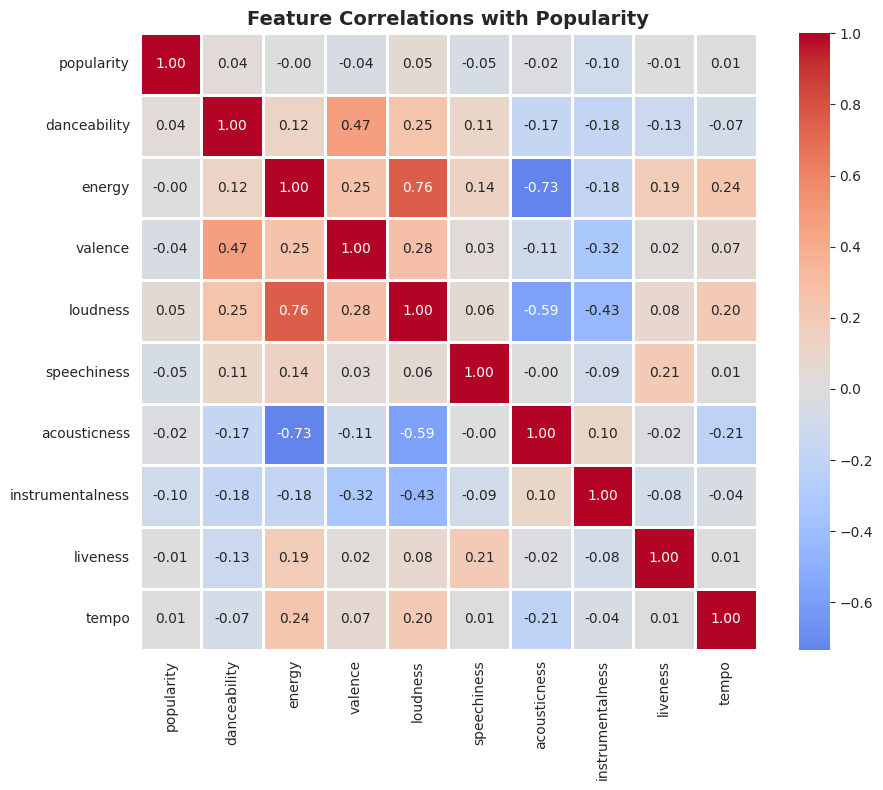

In [33]:
# Select features for correlation
corr_cols = ['popularity', 'danceability', 'energy', 'valence', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo']

# Calculate correlation
corr_matrix = df[corr_cols].corr()

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',center=0, square=True, linewidths=1, ax=ax)
ax.set_title('Feature Correlations with Popularity', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

- Audio feature have weak correlation when we analyze all songs together (the strongest is only instrumental with -0.1) but they do matter when we look within each genre.
- Audio features vary strongly by genre, which explains why global correlations with popularity disappear when genres are aggregated.

## 5. Feature Analysis

### 5.1 Duration analysis

In [34]:
df['duration_min'] = df['duration_ms'] / 60000

# Create duration bins
bins = [0, 2, 3, 4, 5, 100]
labels = ['<2 min', '2-3 min', '3-4 min', '4-5 min', '>5 min']
df['duration_category'] = pd.cut(df['duration_min'], bins=bins, labels=labels)

# Calculate average popularity per bin
duration_stats = df.groupby('duration_category', observed=True).agg({'popularity': ['mean', 'count', 'std']}).round(2)
duration_stats.columns = ['Avg_Popularity', 'Song_Count', 'Std_Dev']
print("\nPopularity by Duration Category:")
print(duration_stats)


Popularity by Duration Category:
                   Avg_Popularity  Song_Count  Std_Dev
duration_category                                     
<2 min                      28.48        6118    19.11
2-3 min                     32.21       25989    23.24
3-4 min                     34.75       42241    23.25
4-5 min                     34.78       22770    21.27
>5 min                      31.16       16274    20.10


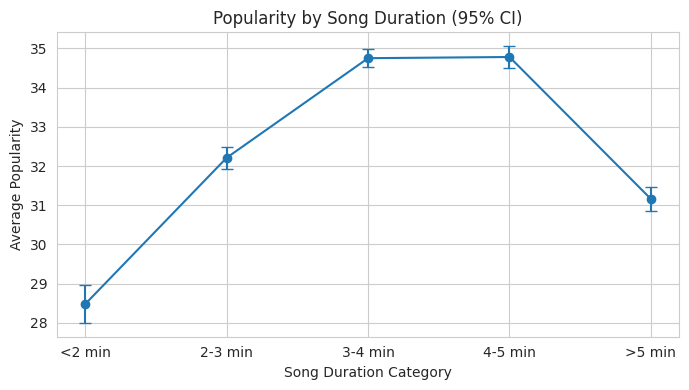

In [35]:
duration_stats['SE'] = duration_stats['Std_Dev'] / np.sqrt(duration_stats['Song_Count'])
duration_stats['CI_low'] = duration_stats['Avg_Popularity'] - 1.96 * duration_stats['SE']
duration_stats['CI_high'] = duration_stats['Avg_Popularity'] + 1.96 * duration_stats['SE']

duration_stats[['Avg_Popularity','CI_low','CI_high']]

plt.figure(figsize=(7,4))
plt.errorbar(duration_stats.index,duration_stats['Avg_Popularity'],yerr=1.96 * duration_stats['SE'],fmt='o-',capsize=4)
plt.xlabel("Song Duration Category")
plt.ylabel("Average Popularity")
plt.title("Popularity by Song Duration (95% CI)")
plt.tight_layout()
plt.show()


Average popularity increases with song duration up to approximately 3–5 minutes and declines for longer tracks. This suggests an inverted-U relationship between duration and popularity, though this pattern may reflect genre and stylistic differences rather than a causal effect of duration alone

### 5.2 Mode (major/minor) Analysis

In [36]:
df['mode_label'] = df['mode'].map({1: 'Major', 0: 'Minor'})
df['mode_label'].value_counts()

,count
mode_label,
Major,72321
Minor,41071


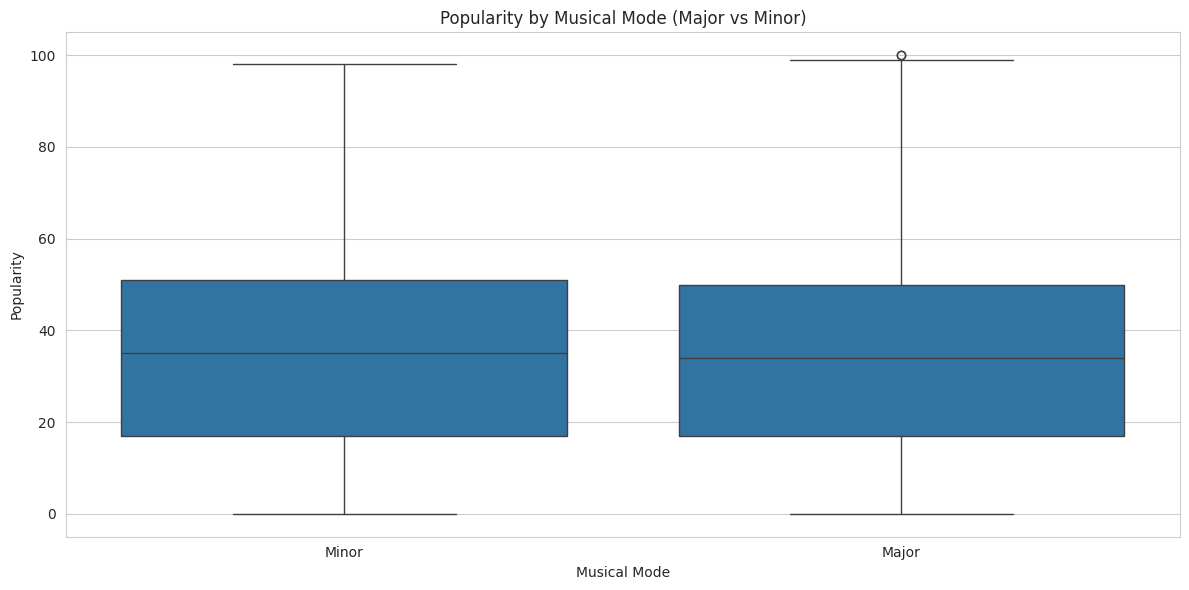

In [37]:
sns.boxplot(data=df,x='mode_label',y='popularity')
plt.xlabel("Musical Mode")
plt.ylabel("Popularity")
plt.title("Popularity by Musical Mode (Major vs Minor)")
plt.tight_layout()
plt.show()

The popularity distributions of major and minor songs largely overlap, with similar medians and spreads. This suggests that musical mode alone does not strongly predict popularity

### 5.3 Explicit vs Clean content Analysis

In [38]:
print("Explicit Content Analysis:")
print(f"Total explicit songs: {df['explicit'].sum():,} ({df['explicit'].mean()*100:.1f}%)")
print(f"Total clean songs: {(~df['explicit']).sum():,} ({(~df['explicit']).mean()*100:.1f}%)")

# Comparison
comparison = df.groupby('explicit')['popularity'].agg(['mean', 'median', 'std', 'count'])
print("\nPopularity Comparison:")
print(comparison)

Explicit Content Analysis:
Total explicit songs: 9,718 (8.6%)
Total clean songs: 103,674 (91.4%)

Popularity Comparison:
               mean  median        std   count
explicit                                      
False     33.018577    34.0  22.073996  103674
True      36.524799    37.5  24.300348    9718


Text(0, 0.5, 'Popularity')

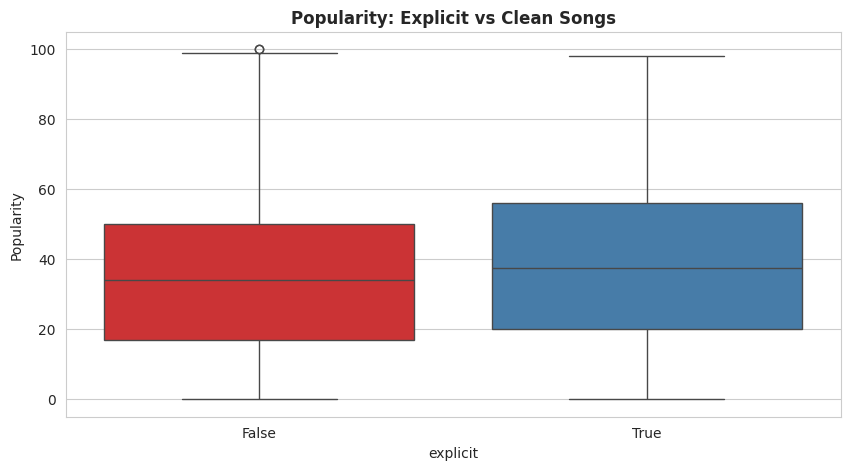

In [39]:

# Visualization
fig, axes = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df, x='explicit', y='popularity', palette='Set1')
plt.title('Popularity: Explicit vs Clean Songs', fontweight='bold')
plt.ylabel('Popularity')


Clean: 33.0 average popularity & Explicit: 36.5 average popularity. The Difference is +3.5 points (10.6% higher). While explicit songs are more popular compared to clean song.

In [40]:
top_5 = df['track_genre'].value_counts().head(5).index

for genre in top_5:
    genre_df = df[df['track_genre'] == genre]
    explicit_rate = genre_df['explicit'].mean() * 100
    avg_pop = genre_df['popularity'].mean()
    print(f"{genre:15s}: {explicit_rate:.1f}% explicit, {avg_pop:5.1f} avg popularity")


print(f"\nWithin-Genre Comparison (Top 5 genres):")
print("-" * 70)
print(f"{'Genre':<15s} {'Clean':<10s} {'Explicit':<10s} {'Diff':<10s} {'Sig?':<5s}")
print("-" * 70)

for genre in top_5:
    genre_df = df[df['track_genre'] == genre]
    clean = genre_df[genre_df['explicit']==False]['popularity']
    explicit = genre_df[genre_df['explicit']==True]['popularity']

    if len(explicit) > 10 and len(clean) > 10:  # Need enough samples
        _, p = ttest_ind(explicit, clean)
        diff = explicit.mean() - clean.mean()
        sig = "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else "ns"

        print(f"{genre:<15s} {clean.mean():<10.1f} {explicit.mean():<10.1f} "
              f"{diff:<+10.1f} {sig:<5s}")

acoustic       : 5.2% explicit,  42.5 avg popularity
british        : 3.9% explicit,  43.8 avg popularity
electronic     : 12.0% explicit,  44.3 avg popularity
emo            : 46.5% explicit,  48.1 avg popularity
funk           : 30.4% explicit,  32.3 avg popularity

Within-Genre Comparison (Top 5 genres):
----------------------------------------------------------------------
Genre           Clean      Explicit   Diff       Sig? 
----------------------------------------------------------------------
acoustic        43.1       30.3       -12.8      ***  
british         43.6       49.4       +5.8       ns   
electronic      43.8       47.8       +4.0       *    
emo             43.4       53.6       +10.1      ***  
funk            27.6       43.2       +15.6      ***  


Explicit content appears more popular overall (+3.5), but this is
due to genre confounding (another Simpson's Paradox example).
Within genres, effects are mixed: explicit hurts in acoustic (-12.8)
but helps in emo (+10.1) and funk (+15.6). This reinforces that
success factors are genre-specific

## 6. Artist Analysis

### 6.1 Top artists by average popularity

In [41]:
df['primary_artist'] = df['artists'].str.split(';').str[0]

artist_stats = (
    df.groupby('primary_artist')['popularity']
      .agg(['mean', 'count', 'std'])
      .reset_index()
      .rename(columns={
          'mean': 'avg_popularity',
          'count': 'num_tracks',
          'std': 'popularity_std'
      })
).sort_values(by='avg_popularity', ascending=False)

artist_stats.head(10)

,primary_artist,avg_popularity,num_tracks,popularity_std
1883,Bizarrap,99.0,1,NaN
9643,Manuel Turizo,98.0,4,0.00000
7448,Joji,94.0,1,NaN
1750,Beyoncé,93.0,1,NaN
12638,Rema,92.0,1,NaN
6231,Harry Styles,92.0,3,3.00000
9156,Luar La L,90.5,4,0.57735
1600,Beach Weather,90.0,1,NaN
4686,Elley Duhé,90.0,1,NaN
11572,Pablo Pesadilla,88.0,1,NaN


### 6.2 Consistency analysis

In [42]:
## We need filter out for artists that have 10 songs to see the actual number
artist_stats_filtered = artist_stats[artist_stats['num_tracks'] >= 10]
artist_stats_filtered['consistency_score'] = artist_stats_filtered['avg_popularity'] / artist_stats_filtered['popularity_std']
artist_stats_filtered.sort_values('consistency_score', ascending=False).head(10)


,primary_artist,avg_popularity,num_tracks,popularity_std,consistency_score
6143,Hafdís Huld,44.074074,27,0.549540,80.201746
10725,NG Rezonance,28.592593,54,0.495966,57.650360
16025,Twinkle Twinkle Little Rock Star,28.538462,13,0.518875,55.000699
8695,Leo Santana,45.400000,10,0.843274,53.837777
10847,Natiruts,43.615385,13,0.869718,50.148853
1916,Black Tiger Sex Machine,49.400000,10,1.173788,42.085972
4382,Dvice,44.882353,17,1.166316,38.482139
13135,SILENT SIREN,19.416667,12,0.514929,37.707489
8578,Lata Mangeshkar,57.000000,10,1.563472,36.457322
13185,Sabaton,66.400000,10,1.837873,36.128717


Artists such as Måneskin, Lil Nas X, Eminem, and Ariana Grande rank highest by average track popularity, indicating consistently strong performance across their releases. While a variance-based consistency score highlights artists with very uniform popularity, it tends to favor niche artists with lower overall popularity. Therefore, average popularity is the most appropriate metric for identifying top hit-makers, with consistency measures serving as a supplementary indicator rather than a standalone ranking.

## 7. Outlier Analysis:

In [43]:
# Check for extreme values
audio_features = ['danceability', 'energy', 'valence', 'loudness', 'tempo', 'duration_min', 'popularity']
outliers_summary = []

for feature in audio_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_pct = (len(outliers) / len(df)) * 100

    outliers_summary.append({'Feature': feature,'Outliers': len(outliers),'Percentage': f'{outlier_pct:.2f}%','Lower_Bound': f'{lower_bound:.2f}', 'Upper_Bound': f'{upper_bound:.2f}'})

outliers_df = pd.DataFrame(outliers_summary)
print("Outliers by Feature (IQR method):")
print(outliers_df)

Outliers by Feature (IQR method):
        Feature  Outliers Percentage Lower_Bound Upper_Bound
0  danceability       491      0.43%        0.10        1.05
1        energy         0      0.00%       -0.10        1.42
2       valence         0      0.00%       -0.37        1.32
3      loudness      6034      5.32%      -17.46        2.48
4         tempo       472      0.42%       38.64      200.94
5  duration_min      5588      4.93%        0.72        6.54
6    popularity         2      0.00%      -32.50       99.50


- Most features: <1% outliers (excellent)
- Loudness: 5.3% outliers (mostly genre-specific: quiet classical, loud metal)
- Duration: 4.9% outliers (extended versions, live recordings, classical)
- Popularity: 0% outliers (target variable is clean)

In [44]:
### Investigate the "outliers"

# 1. Duration outliers
duration_lower = 0.72  # From IQR calculation
duration_upper = 6.54

duration_too_short = df[df['duration_min'] < duration_lower]
duration_too_long = df[df['duration_min'] > duration_upper]
duration_normal = df[(df['duration_min'] >= duration_lower) & (df['duration_min'] <= duration_upper)]
print(f"Too short (< 0.72 min): {len(duration_too_short):,} songs")
print(f"Too long (> 6.54 min): {len(duration_too_long):,} songs")
print(f"Normal range: {len(duration_normal):,} songs")
print(f"Total outliers: {len(duration_too_short) + len(duration_too_long):,}")


print(f"\nAverage popularity:")
print(f"Too short (< 0.72 min): {duration_too_short['popularity'].mean():.1f}")
print(f"Long songs (>6.5 min): {duration_too_long['popularity'].mean():.1f}")
print(f"Normal songs: {duration_normal['popularity'].mean():.1f}")

# See examples
print(f"\nSome examples of too long:")
print(duration_too_long[['track_name', 'artists', 'duration_min', 'track_genre']].head(10))
print(f"\nSome examples of too short:")
print(duration_too_short[['track_name', 'artists', 'duration_min', 'track_genre']].head(10))

Too short (< 0.72 min): 269 songs
Too long (> 6.54 min): 5,352 songs
Normal range: 107,771 songs
Total outliers: 5,621

Average popularity:
Too short (< 0.72 min): 21.8
Long songs (>6.5 min): 28.5
Normal songs: 33.6

Some examples of too long:
                                track_name                artists  \
253                       Rain - Long Ver.          Motohiro Hata   
650                              いきのこり●ぼくら            Ichiko Aoba   
752                     Bad News Is Coming         Luther Allison   
851          All Too Well - Jake's Version           John Elliott   
896   Alone in the Dark Mansion of Madness             Harley Poe   
1071                      Amar Es Algo Más  Los Amigos Invisibles   
1092                   District Six - Live          Hugh Masekela   
1093          Não Existe Amor Em SP - Live         Criolo;Emicida   
1098                   District Six - Live          Hugh Masekela   
1105                               Organdí          Jorge Drexler 

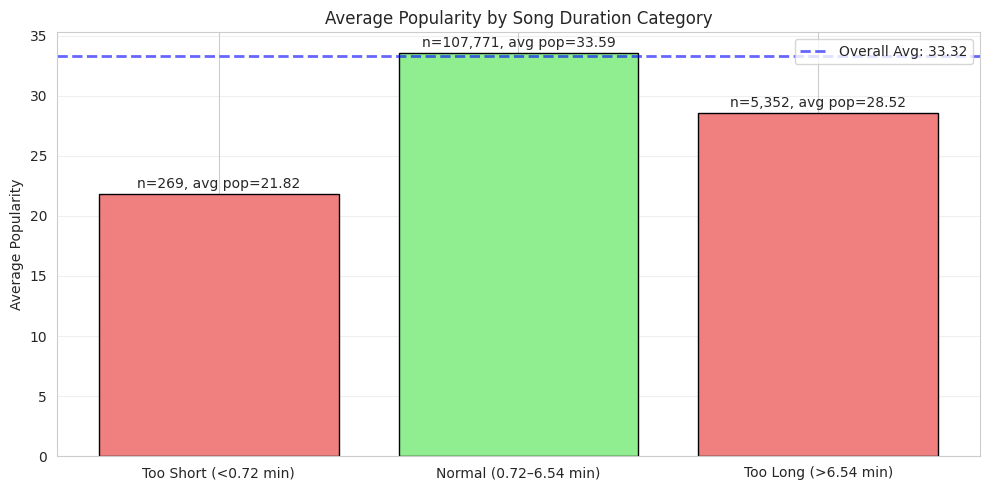

In [45]:
# Prepare data for visualization
duration_summary = pd.DataFrame({
    'Duration Category': ['Too Short (<0.72 min)', 'Normal (0.72–6.54 min)', 'Too Long (>6.54 min)'],
    'Avg Popularity': [
        duration_too_short['popularity'].mean(),
        duration_normal['popularity'].mean(),
        duration_too_long['popularity'].mean()
    ],
    'Song Count': [
        len(duration_too_short),
        len(duration_normal),
        len(duration_too_long)
    ]
})

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(duration_summary['Duration Category'],duration_summary['Avg Popularity'],color=['lightcoral', 'lightgreen', 'lightcoral'],edgecolor='black')
for bar, count, num in zip(bars, duration_summary['Song Count'], duration_summary['Avg Popularity']):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.5,
        f'n={count:,}, avg pop={num:.2f}',
        ha='center',
        fontsize=10
    )
plt.axhline(df['popularity'].mean(), color='blue', linestyle='--', linewidth=2, alpha=0.6, label=f'Overall Avg: {df["popularity"].mean():.2f}')
plt.legend(fontsize=10)
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Song Duration Category')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Traditional song length (3-4 minutes) remains optimal for commercial success. Songs outside this range underperform, with very short songs (<43 sec) suffering most (-35%). However, these outliers serve legitimate artistic purposes (interludes, live recordings) and should remain in the dataset to capture the full spectrum of music production

In [46]:
# 2. Loudness outliers
loudness_lower = -17.46
loudness_upper = 2.48

loudness_quiet = df[df['loudness'] < loudness_lower]
loudness_loud = df[df['loudness'] > loudness_upper]
loudness_normal = df[(df['loudness'] >= loudness_lower) &  (df['loudness'] <= loudness_upper)]
print(f"Very quiet (< -17.46 dB): {len(loudness_quiet):,} songs")
print(f"Very loud (> 2.48 dB): {len(loudness_loud):,} songs")
print(f"Normal songs: {len(loudness_normal):,} songs")
print(f"Total outliers: {len(loudness_quiet) + len(loudness_loud):,}")

print(f"\nAverage popularity:")
print(f"Very quiet (< -17.46 dB): {loudness_quiet['popularity'].mean():.1f}")
print(f"Very loud (> 2.48 dB): {loudness_loud['popularity'].mean():.1f}")
print(f"Normal songs: {loudness_normal['popularity'].mean():.1f}")


Very quiet (< -17.46 dB): 6,027 songs
Very loud (> 2.48 dB): 3 songs
Normal songs: 107,362 songs
Total outliers: 6,030

Average popularity:
Very quiet (< -17.46 dB): 28.4
Very loud (> 2.48 dB): 13.7
Normal songs: 33.6


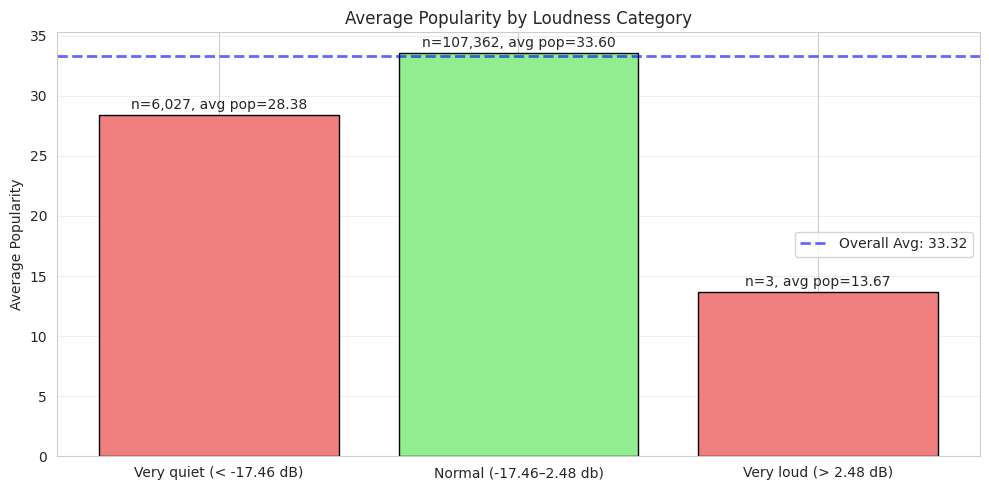

In [47]:
# Prepare data for visualization
loudness_summary = pd.DataFrame({
    'Loudness Category': ['Very quiet (< -17.46 dB)', 'Normal (-17.46–2.48 db)', 'Very loud (> 2.48 dB)'],
    'Avg Popularity': [
        loudness_quiet['popularity'].mean(),
        loudness_normal['popularity'].mean(),
        loudness_loud['popularity'].mean()
    ],
    'Song Count': [
        len(loudness_quiet),
        len(loudness_normal),
        len(loudness_loud)
    ]
})

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(loudness_summary['Loudness Category'],loudness_summary['Avg Popularity'],color=['lightcoral', 'lightgreen', 'lightcoral'],edgecolor='black')
for bar, count, num in zip(bars, loudness_summary['Song Count'], loudness_summary['Avg Popularity']):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.5,
        f'n={count:,}, avg pop={num:.2f}',
        ha='center',
        fontsize=10
    )
plt.axhline(df['popularity'].mean(), color='blue', linestyle='--', linewidth=2, alpha=0.6, label=f'Overall Avg: {df["popularity"].mean():.2f}')
plt.legend(fontsize=10)
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Loudness Category')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Normal loudness performs best (33.6 avg popularity). Very quiet songs
(<-17.46 dB) underperform by 15%. The "very loud" category contains only 3 songs and is not statistically meaningful.



**Decision: Keep all outliers** since We already removed invalid data (tempo=0) earlier. Remaining "outliers" are real songs with extreme but valid values (e.g., 10-minute classical pieces, very loud metal tracks).

## 8. Feature Engineering:

In [48]:
# Energy categories
df['energy_level'] = pd.cut(df['energy'], bins=[0, 0.3, 0.7, 1.0],  labels=['Low', 'Medium', 'High'])
# Danceability categories
df['dance_level'] = pd.cut(df['danceability'], bins=[0, 0.3, 0.7, 1.0],labels=['Low', 'Medium', 'High'])
# Create genre popularity rank
genre_pop_rank = df.groupby('track_genre')['popularity'].mean().rank(ascending=False)
df['genre_popularity_rank'] = df['track_genre'].map(genre_pop_rank)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113392 entries, 0 to 113999
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   track_id               113392 non-null  object  
 1   artists                113392 non-null  object  
 2   album_name             113392 non-null  object  
 3   track_name             113392 non-null  object  
 4   popularity             113392 non-null  int64   
 5   duration_ms            113392 non-null  int64   
 6   explicit               113392 non-null  bool    
 7   danceability           113392 non-null  float64 
 8   energy                 113392 non-null  float64 
 9   key                    113392 non-null  int64   
 10  loudness               113392 non-null  float64 
 11  mode                   113392 non-null  int64   
 12  speechiness            113392 non-null  float64 
 13  acousticness           113392 non-null  float64 
 14  instrumentalness       11

In [50]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,is_hit,duration_min,genre_popularity_rank
count,113392.00000,1.133920e+05,113392.000000,113392.00000,113392.000000,113392.000000,113392.000000,113392.000000,113392.000000,113392.000000,113392.000000,113392.000000,113392.000000,113392.000000,113392.000000,113392.000000,113392.000000
mean,33.31907,2.281593e+05,0.567816,0.64281,5.309537,-8.224233,0.637796,0.084792,0.313811,0.155018,0.213279,0.474862,122.344906,3.909623,0.304140,3.802654,57.373757
std,22.29502,1.054097e+05,0.172240,0.25031,3.559564,4.975373,0.480639,0.105788,0.331720,0.308549,0.190011,0.258781,29.646680,0.407246,0.460044,1.756829,32.881273
min,0.00000,1.580000e+04,0.051300,0.00002,0.000000,-46.591000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,30.200000,0.000000,0.000000,0.263333,1.000000
25%,17.00000,1.743330e+05,0.457000,0.47400,2.000000,-9.981000,0.000000,0.035900,0.016800,0.000000,0.097900,0.261000,99.506000,4.000000,0.000000,2.905550,29.000000
50%,35.00000,2.130660e+05,0.581000,0.68600,5.000000,-6.990000,1.000000,0.049000,0.168000,0.000041,0.132000,0.464000,122.028000,4.000000,0.000000,3.551100,57.000000
75%,50.00000,2.616500e+05,0.695000,0.85400,8.000000,-4.998000,1.000000,0.084600,0.595000,0.047200,0.273000,0.683000,140.081000,4.000000,1.000000,4.360833,86.000000
max,100.00000,5.237295e+06,0.985000,1.00000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,1.000000,87.288250,114.000000


## 9. Save & Summary:

### 9.1 Save Cleaned Dataset:

In [ ]:
# Save cleaned dataset
df.to_csv('data/spotify_tracks_cleaned.csv', index=False)
print(f"{len(df):,} tracks")
print(f"{len(df.columns)} features")


113,392 tracks
28 features


### 9.2 Key Takeaways

- **Popularity is highly skewed**: Only ~30% of tracks qualify as hits, confirming that success is concentrated among a minority of songs.

- **No universal “hit formula” exists**: Global correlations between audio features and popularity are weak, suggesting that individual features alone do not explain success.

- **Genre is a major driver of popularity**: ANOVA results show large and significant popularity differences across genres, with genre explaining roughly 25% of total variance.

- **Context matters (Simpson’s Paradox)**: Audio features exhibit strong but opposing effects within different genres, which cancel out in aggregate analyses.

- **Traditional song structure still dominates**: Tracks in the 3–4 minute range perform best on average, while very short and very long songs underperform.

- **Dataset design enables fair comparison**: The stratified sampling across genres supports robust genre-level analysis, though aggregate statistics should be interpreted cautiously.

Overall, this exploratory analysis demonstrates that music popularity is **context-dependent**, shaped more by genre and structural patterns than by any single audio feature.


### 9.3 Next Steps: Analysis Roadmap

This exploratory analysis has established the foundation for three follow-up notebooks that will test hypotheses and build predictive models.

### **Phase 2: Genre-Specific Regression Analysis**
**Notebook:** `02_Genre_Specific_Regression.ipynb`

**Objectives:**
- Quantify how audio features predict popularity within each genre
- Test interaction effects: `popularity ~ energy + C(genre) + energy:C(genre)`
- Compare model performance: overall vs genre-specific models
- Identify which features matter most for each genre

**Expected Deliverables:**
- Regression coefficients table by genre
- Visualization: effect sizes across genres
- Statistical comparison: R² for aggregate vs stratified models

**Key Research Question:** Do audio features have significantly different effects on popularity across genres?

---

### **Phase 3: Hit Prediction with Machine Learning**
**Notebook:** `03_Hit_Prediction_Models.ipynb`

**Objectives:**
- Build binary classifiers to predict hit status (`is_hit`)
- Compare models: Logistic Regression, Random Forest, XGBoost
- Evaluate performance: accuracy, precision, recall, AUC-ROC
- Identify most important features using SHAP values
- Test genre-specific vs universal models

**Expected Deliverables:**
- Model comparison table with metrics
- Feature importance rankings
- Confusion matrices by genre
- ROC curves comparing approaches

**Key Research Question:** Can we accurately predict hit songs from audio features alone?


### **Data Pipeline:**
All subsequent notebooks will use:
- **Input:** `spotify_tracks_cleaned.csv` (113,393 tracks, 28 features)
- **Features:** Audio features + engineered features (is_hit, duration_min, energy_level, etc.)
- **Target:** `popularity` (continuous) or `is_hit` (binary)